In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [4]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Let's first remove null values

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
df.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        1           1   
1        2  02-01-2018       1     0      1        0        2           1   
2        3  03-01-2018       1     0      1        0        3           1   
3        4  04-01-2018       1     0      1        0        4           1   
4        5  05-01-2018       1     0      1        0        5           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [11]:
df_copy = df.copy()

In [12]:
df_copy.shape

(730, 16)

In [13]:
df_copy.drop_duplicates(inplace=True)

In [14]:
df_copy.shape

(730, 16)

In [15]:
df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [16]:
df

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0         1     0      1        0        1           1           2  14.110847   
1         1     0      1        0        2           1           2  14.902598   
2         1     0      1        0        3           1           1   8.050924   
3         1     0      1        0        4           1           1   8.200000   
4         1     0      1        0        5           1           1   9.305237   
..      ...   ...    ...      ...      ...         ...         ...        ...   
725       1     1     12        0        5           1           2  10.420847   
726       1     1     12        0        6           0           2  10.386653   
727       1     1     12        0        0           0           2  10.386653   
728       1     1     12        0        1           1           1  10.489153   
729       1     1     12        0        2           1           2   8.849153   

        atemp  humidity  windspeed   cnt  
0    18.18125   80.5833  10.749882   985  
1    17.68695   69.6087  16.652113   801  
2     9.47025   43.7273  16.636703  1349  
3    10.60610   59.0435  10.739832  1562  
4    11.46350   43.6957  12.522300  1600  
..        ...       ...        ...   ...  
725  11.33210   65.2917  23.458911  2114  
726  12.75230   59.0000  10.416557  3095  
727  12.12000   75.2917   8.333661  1341  
728  11.58500   48.3333  23.500518  1796  
729  11.17435   57.7500  10.374682  2729  

[730 rows x 12 columns]

In [17]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [18]:
df.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0  spring     0      1        0        1           1           2  14.110847   
1  spring     0      1        0        2           1           2  14.902598   
2  spring     0      1        0        3           1           1   8.050924   
3  spring     0      1        0        4           1           1   8.200000   
4  spring     0      1        0        5           1           1   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

In [19]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [20]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [21]:
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [22]:
df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1      Misty  14.110847   
1  spring     0   jan        0     tue           1      Misty  14.902598   
2  spring     0   jan        0     wed           1      Clear   8.050924   
3  spring     0   jan        0     thu           1      Clear   8.200000   
4  spring     0   jan        0     fri           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


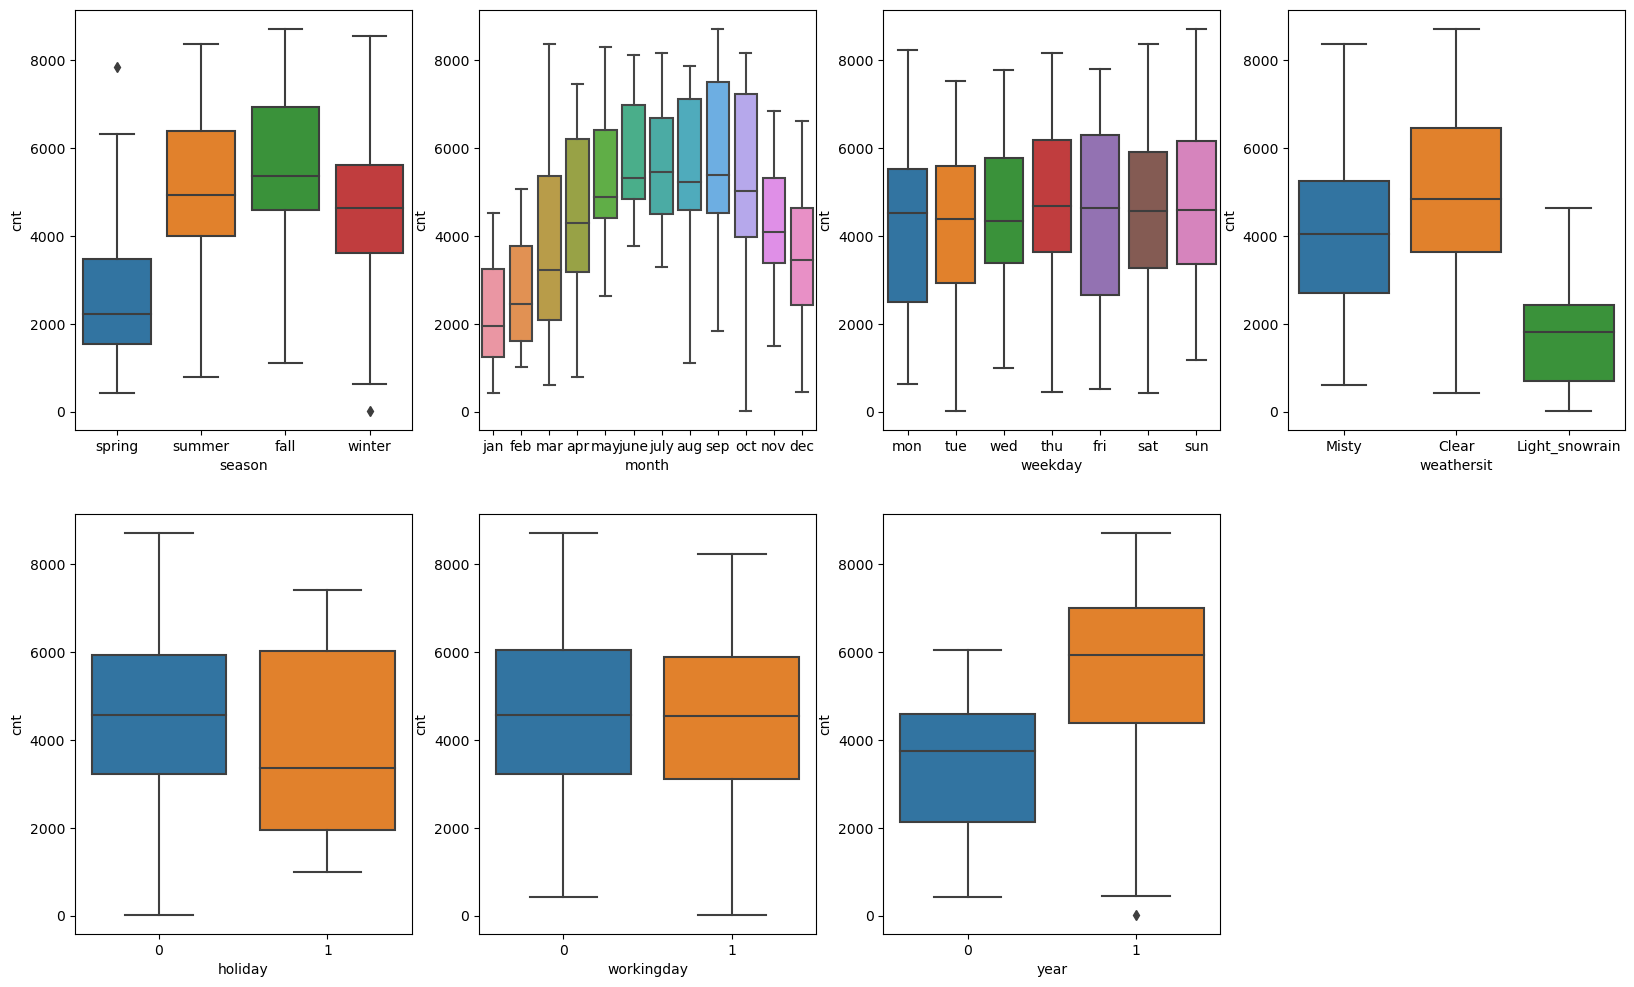

In [24]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [25]:
df

season  year month  holiday weekday  workingday weathersit       temp  \
0    spring     0   jan        0     mon           1      Misty  14.110847   
1    spring     0   jan        0     tue           1      Misty  14.902598   
2    spring     0   jan        0     wed           1      Clear   8.050924   
3    spring     0   jan        0     thu           1      Clear   8.200000   
4    spring     0   jan        0     fri           1      Clear   9.305237   
..      ...   ...   ...      ...     ...         ...        ...        ...   
725  spring     1   dec        0     fri           1      Misty  10.420847   
726  spring     1   dec        0     sat           0      Misty  10.386653   
727  spring     1   dec        0     sun           0      Misty  10.386653   
728  spring     1   dec        0     mon           1      Clear  10.489153   
729  spring     1   dec        0     tue           1      Misty   8.849153   

        atemp  humidity  windspeed   cnt  
0    18.18125   80.5833  10.749882   985  
1    17.68695   69.6087  16.652113   801  
2     9.47025   43.7273  16.636703  1349  
3    10.60610   59.0435  10.739832  1562  
4    11.46350   43.6957  12.522300  1600  
..        ...       ...        ...   ...  
725  11.33210   65.2917  23.458911  2114  
726  12.75230   59.0000  10.416557  3095  
727  12.12000   75.2917   8.333661  1341  
728  11.58500   48.3333  23.500518  1796  
729  11.17435   57.7500  10.374682  2729  

[730 rows x 12 columns]

In [26]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt', data = df)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data = df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

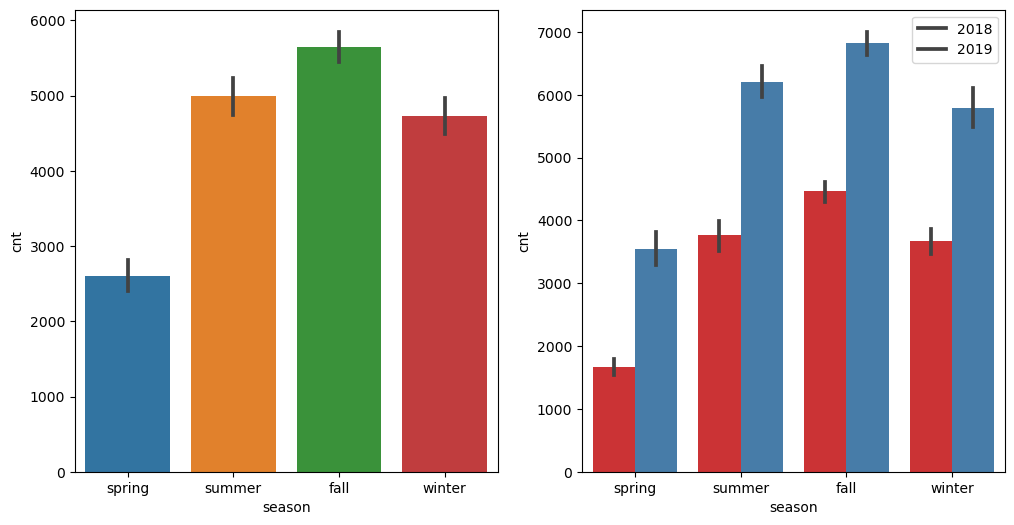

In [27]:
plot_cat_columns('season')

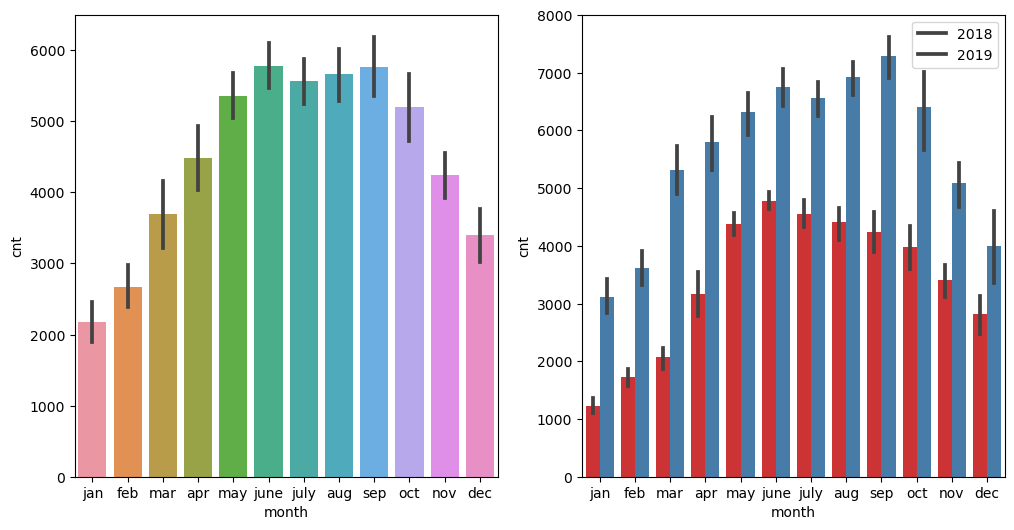

In [28]:
plot_cat_columns('month')

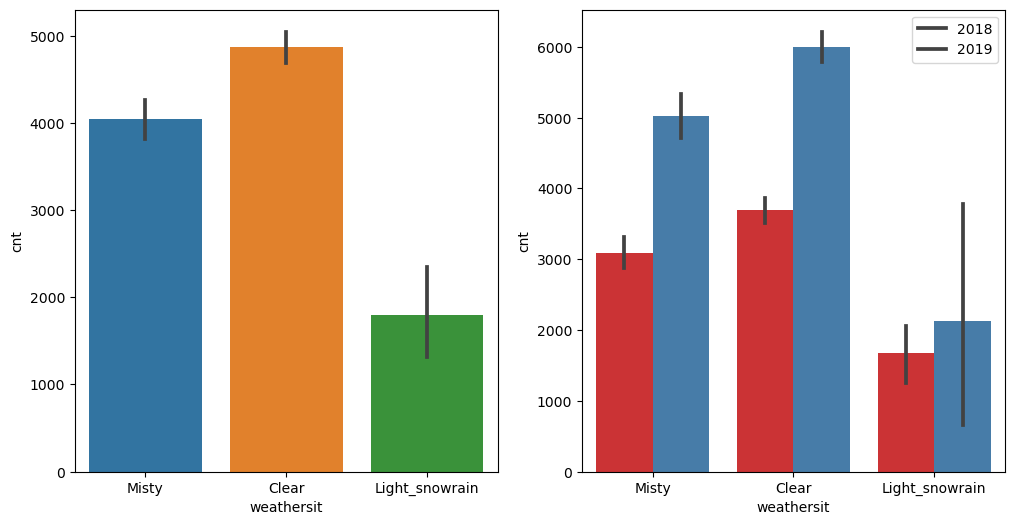

In [29]:
plot_cat_columns('weathersit')

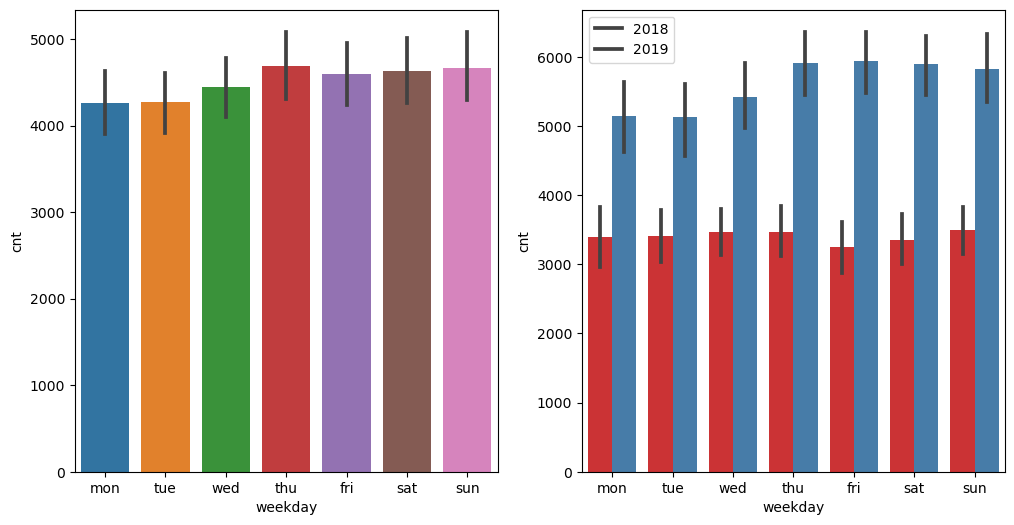

In [30]:
plot_cat_columns('weekday')

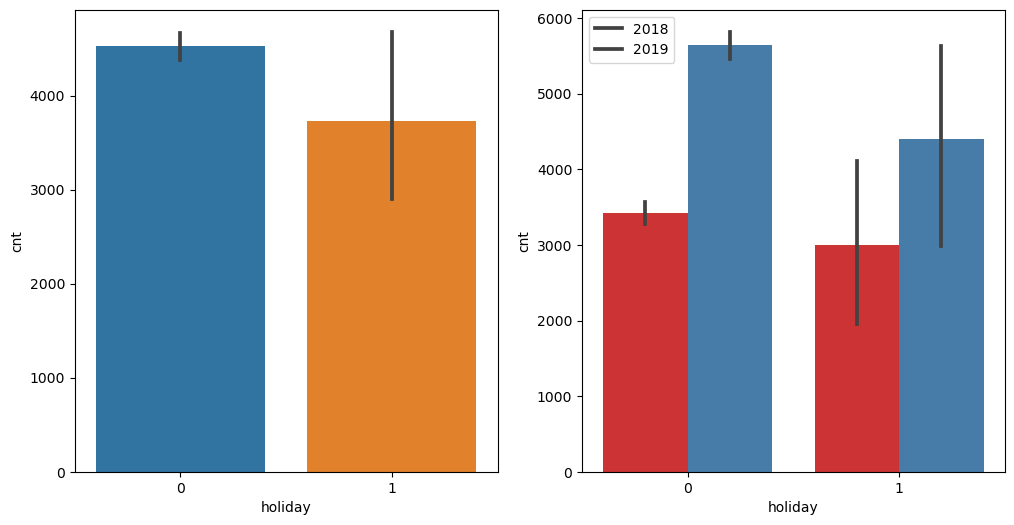

In [31]:
plot_cat_columns('holiday')

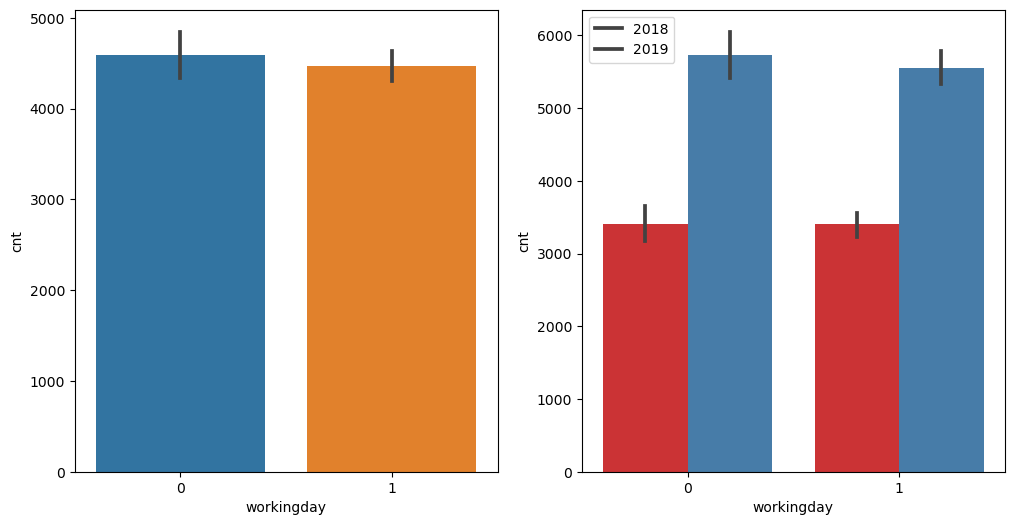

In [32]:
plot_cat_columns('workingday')

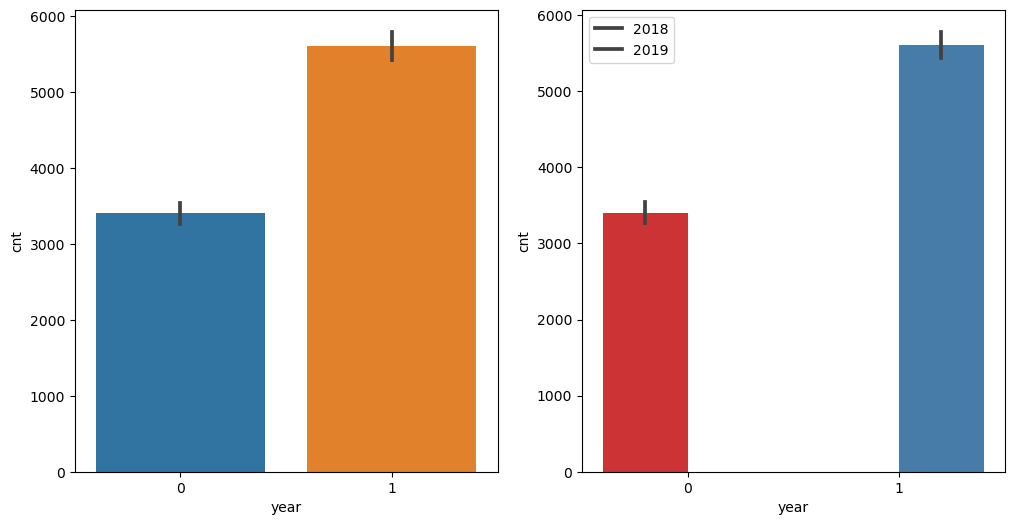

In [33]:
plot_cat_columns('year')

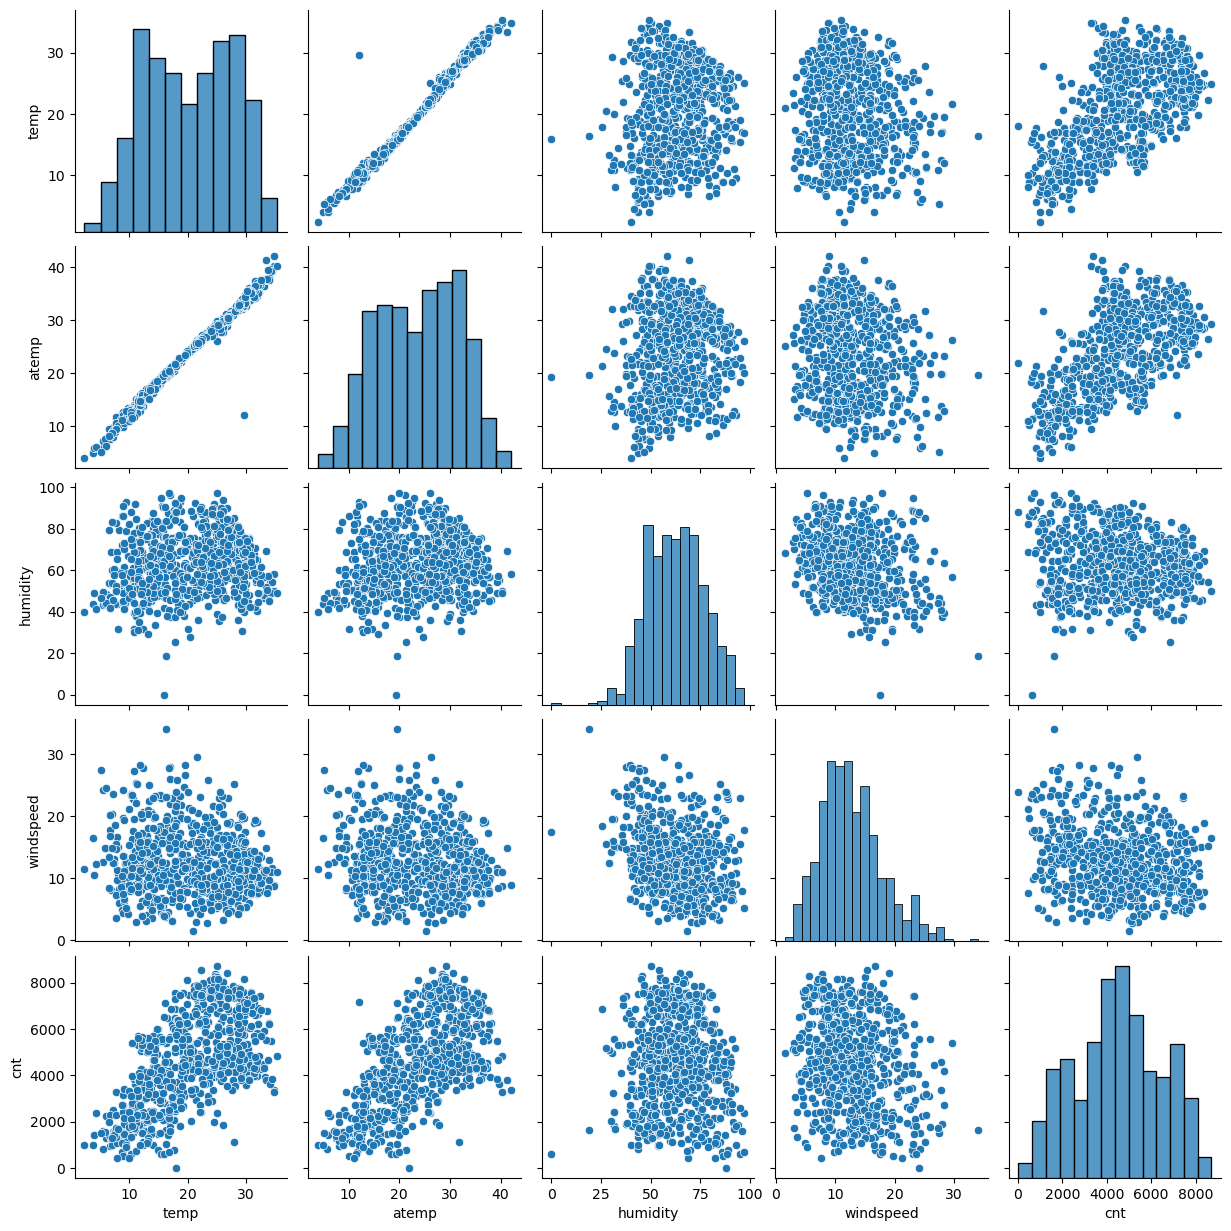

In [34]:
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

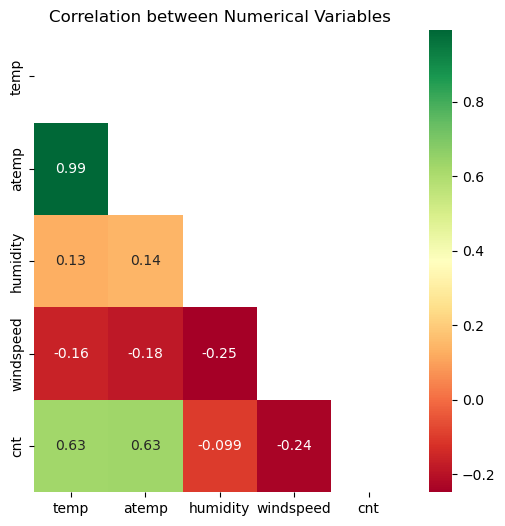

In [35]:
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [36]:
df

season  year month  holiday weekday  workingday weathersit       temp  \
0    spring     0   jan        0     mon           1      Misty  14.110847   
1    spring     0   jan        0     tue           1      Misty  14.902598   
2    spring     0   jan        0     wed           1      Clear   8.050924   
3    spring     0   jan        0     thu           1      Clear   8.200000   
4    spring     0   jan        0     fri           1      Clear   9.305237   
..      ...   ...   ...      ...     ...         ...        ...        ...   
725  spring     1   dec        0     fri           1      Misty  10.420847   
726  spring     1   dec        0     sat           0      Misty  10.386653   
727  spring     1   dec        0     sun           0      Misty  10.386653   
728  spring     1   dec        0     mon           1      Clear  10.489153   
729  spring     1   dec        0     tue           1      Misty   8.849153   

        atemp  humidity  windspeed   cnt  
0    18.18125   80.5833  10.749882   985  
1    17.68695   69.6087  16.652113   801  
2     9.47025   43.7273  16.636703  1349  
3    10.60610   59.0435  10.739832  1562  
4    11.46350   43.6957  12.522300  1600  
..        ...       ...        ...   ...  
725  11.33210   65.2917  23.458911  2114  
726  12.75230   59.0000  10.416557  3095  
727  12.12000   75.2917   8.333661  1341  
728  11.58500   48.3333  23.500518  1796  
729  11.17435   57.7500  10.374682  2729  

[730 rows x 12 columns]

In [37]:
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [38]:
seasons_df

spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]

In [39]:
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [40]:
df_new

season  year month  holiday weekday  workingday weathersit       temp  \
0    spring     0   jan        0     mon           1      Misty  14.110847   
1    spring     0   jan        0     tue           1      Misty  14.902598   
2    spring     0   jan        0     wed           1      Clear   8.050924   
3    spring     0   jan        0     thu           1      Clear   8.200000   
4    spring     0   jan        0     fri           1      Clear   9.305237   
..      ...   ...   ...      ...     ...         ...        ...        ...   
725  spring     1   dec        0     fri           1      Misty  10.420847   
726  spring     1   dec        0     sat           0      Misty  10.386653   
727  spring     1   dec        0     sun           0      Misty  10.386653   
728  spring     1   dec        0     mon           1      Clear  10.489153   
729  spring     1   dec        0     tue           1      Misty   8.849153   

        atemp  humidity  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
0    18.18125   80.5833  ...    0    0    0    0    0               0      1   
1    17.68695   69.6087  ...    0    0    0    1    0               0      1   
2     9.47025   43.7273  ...    0    0    0    0    1               0      0   
3    10.60610   59.0435  ...    0    0    1    0    0               0      0   
4    11.46350   43.6957  ...    0    0    0    0    0               0      0   
..        ...       ...  ...  ...  ...  ...  ...  ...             ...    ...   
725  11.33210   65.2917  ...    0    0    0    0    0               0      1   
726  12.75230   59.0000  ...    1    0    0    0    0               0      1   
727  12.12000   75.2917  ...    0    1    0    0    0               0      1   
728  11.58500   48.3333  ...    0    0    0    0    0               0      0   
729  11.17435   57.7500  ...    0    0    0    1    0               0      1   

     spring  summer  winter  
0         1       0       0  
1         1       0       0  
2         1       0       0  
3         1       0       0  
4         1       0       0  
..      ...     ...     ...  
725       1       0       0  
726       1       0       0  
727       1       0       0  
728       1       0       0  
729       1       0       0  

[730 rows x 34 columns]

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [42]:
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [43]:
df_new

year  holiday  workingday       temp     atemp  humidity  windspeed  \
0       0        0           1  14.110847  18.18125   80.5833  10.749882   
1       0        0           1  14.902598  17.68695   69.6087  16.652113   
2       0        0           1   8.050924   9.47025   43.7273  16.636703   
3       0        0           1   8.200000  10.60610   59.0435  10.739832   
4       0        0           1   9.305237  11.46350   43.6957  12.522300   
..    ...      ...         ...        ...       ...       ...        ...   
725     1        0           1  10.420847  11.33210   65.2917  23.458911   
726     1        0           0  10.386653  12.75230   59.0000  10.416557   
727     1        0           0  10.386653  12.12000   75.2917   8.333661   
728     1        0           1  10.489153  11.58500   48.3333  23.500518   
729     1        0           1   8.849153  11.17435   57.7500  10.374682   

      cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
0     985    0    0  ...    0    0    0    0    0               0      1   
1     801    0    0  ...    0    0    0    1    0               0      1   
2    1349    0    0  ...    0    0    0    0    1               0      0   
3    1562    0    0  ...    0    0    1    0    0               0      0   
4    1600    0    0  ...    0    0    0    0    0               0      0   
..    ...  ...  ...  ...  ...  ...  ...  ...  ...             ...    ...   
725  2114    0    1  ...    0    0    0    0    0               0      1   
726  3095    0    1  ...    1    0    0    0    0               0      1   
727  1341    0    1  ...    0    1    0    0    0               0      1   
728  1796    0    1  ...    0    0    0    0    0               0      0   
729  2729    0    1  ...    0    0    0    1    0               0      1   

     spring  summer  winter  
0         1       0       0  
1         1       0       0  
2         1       0       0  
3         1       0       0  
4         1       0       0  
..      ...     ...     ...  
725       1       0       0  
726       1       0       0  
727       1       0       0  
728       1       0       0  
729       1       0       0  

[730 rows x 30 columns]

In [44]:
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [45]:
df_test

year  holiday  workingday       temp     atemp  humidity  windspeed  \
184     0        1           0  29.793347  33.27085   63.7917   5.459106   
535     1        0           1  32.082500  36.04875   59.2083   7.625404   
299     0        0           0  19.270000  22.85230   81.2917  13.250121   
221     0        0           1  31.433347  34.24915   42.4167  13.417286   
152     0        0           0  29.315000  32.19710   30.5000  19.583229   
..    ...      ...         ...        ...       ...       ...        ...   
702     1        0           1  19.509153  23.45270   73.3750  11.666643   
127     0        0           1  21.661653  25.94665   63.1667   5.000712   
640     1        0           1  26.957500  29.95665   79.3750   4.458569   
72      0        0           1  13.333897  16.60000   49.6957   9.174042   
653     1        0           1  19.201653  23.04230   55.8333  12.208807   

      cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184  6043    0    0  ...    0    0    0    0    1               0      1   
535  6211    0    0  ...    0    0    1    0    0               0      0   
299  2659    0    0  ...    1    0    0    0    0               0      1   
221  4780    1    0  ...    0    0    0    0    0               0      0   
152  4968    0    0  ...    1    0    0    0    0               0      0   
..    ...  ...  ...  ...  ...  ...  ...  ...  ...             ...    ...   
702  6606    0    1  ...    0    0    0    0    1               0      0   
127  4333    0    0  ...    0    0    0    1    0               0      0   
640  7572    0    0  ...    0    0    1    0    0               0      1   
72   2046    0    0  ...    0    0    0    0    1               0      0   
653  7534    0    0  ...    0    0    0    0    1               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  
..      ...     ...     ...  
702       0       0       1  
127       0       1       0  
640       0       0       1  
72        1       0       0  
653       0       0       1  

[220 rows x 30 columns]

In [46]:
scaler = MinMaxScaler()

In [47]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train

year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           1  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           0  0.345824  0.318819  0.751824   0.380981   
..    ...      ...         ...       ...       ...       ...        ...   
578     1        0           1  0.863973  0.824359  0.679690   0.187140   
53      0        0           1  0.202618  0.218747  0.435939   0.111379   
350     0        0           1  0.248216  0.223544  0.577930   0.431816   
79      0        0           1  0.462664  0.434043  0.759870   0.529881   
520     1        0           1  0.600225  0.586515  0.632030   0.359599   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
576  0.827658    0    0  ...    0    0    0    0    1               0      0   
426  0.465255    0    0  ...    0    1    0    0    0               0      1   
728  0.204096    0    1  ...    0    0    0    0    0               0      0   
482  0.482973    0    0  ...    0    1    0    0    0               0      1   
111  0.191095    0    0  ...    0    1    0    0    0               0      1   
..        ...  ...  ...  ...  ...  ...  ...  ...  ...             ...    ...   
578  0.832835    1    0  ...    0    0    0    0    0               0      0   
53   0.218017    0    0  ...    0    0    0    0    0               0      0   
350  0.312586    0    1  ...    0    0    0    0    0               0      1   
79   0.236424    0    0  ...    0    0    0    0    1               0      1   
520  0.802922    0    0  ...    0    0    0    0    1               0      1   

     spring  summer  winter  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  
111       0       1       0  
..      ...     ...     ...  
578       0       0       0  
53        1       0       0  
350       0       0       1  
79        0       1       0  
520       0       1       0  

[510 rows x 30 columns]

In [49]:
df_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.453386    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt         aug         dec  ...         sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.096078    0.084314  ...    0.129412   
std      0.169803    0.224421    0.294988    0.278131  ...    0.335985   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  510.000000  510.000000  510.000000  510.000000      510.000000   
mean     0.137255    0.143137    0.152941    0.135294        0.029412   
std      0.344454    0.350557    0.360284    0.342373        0.169124   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.345098    0.243137    0.247059    0.247059  
std      0.475867    0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

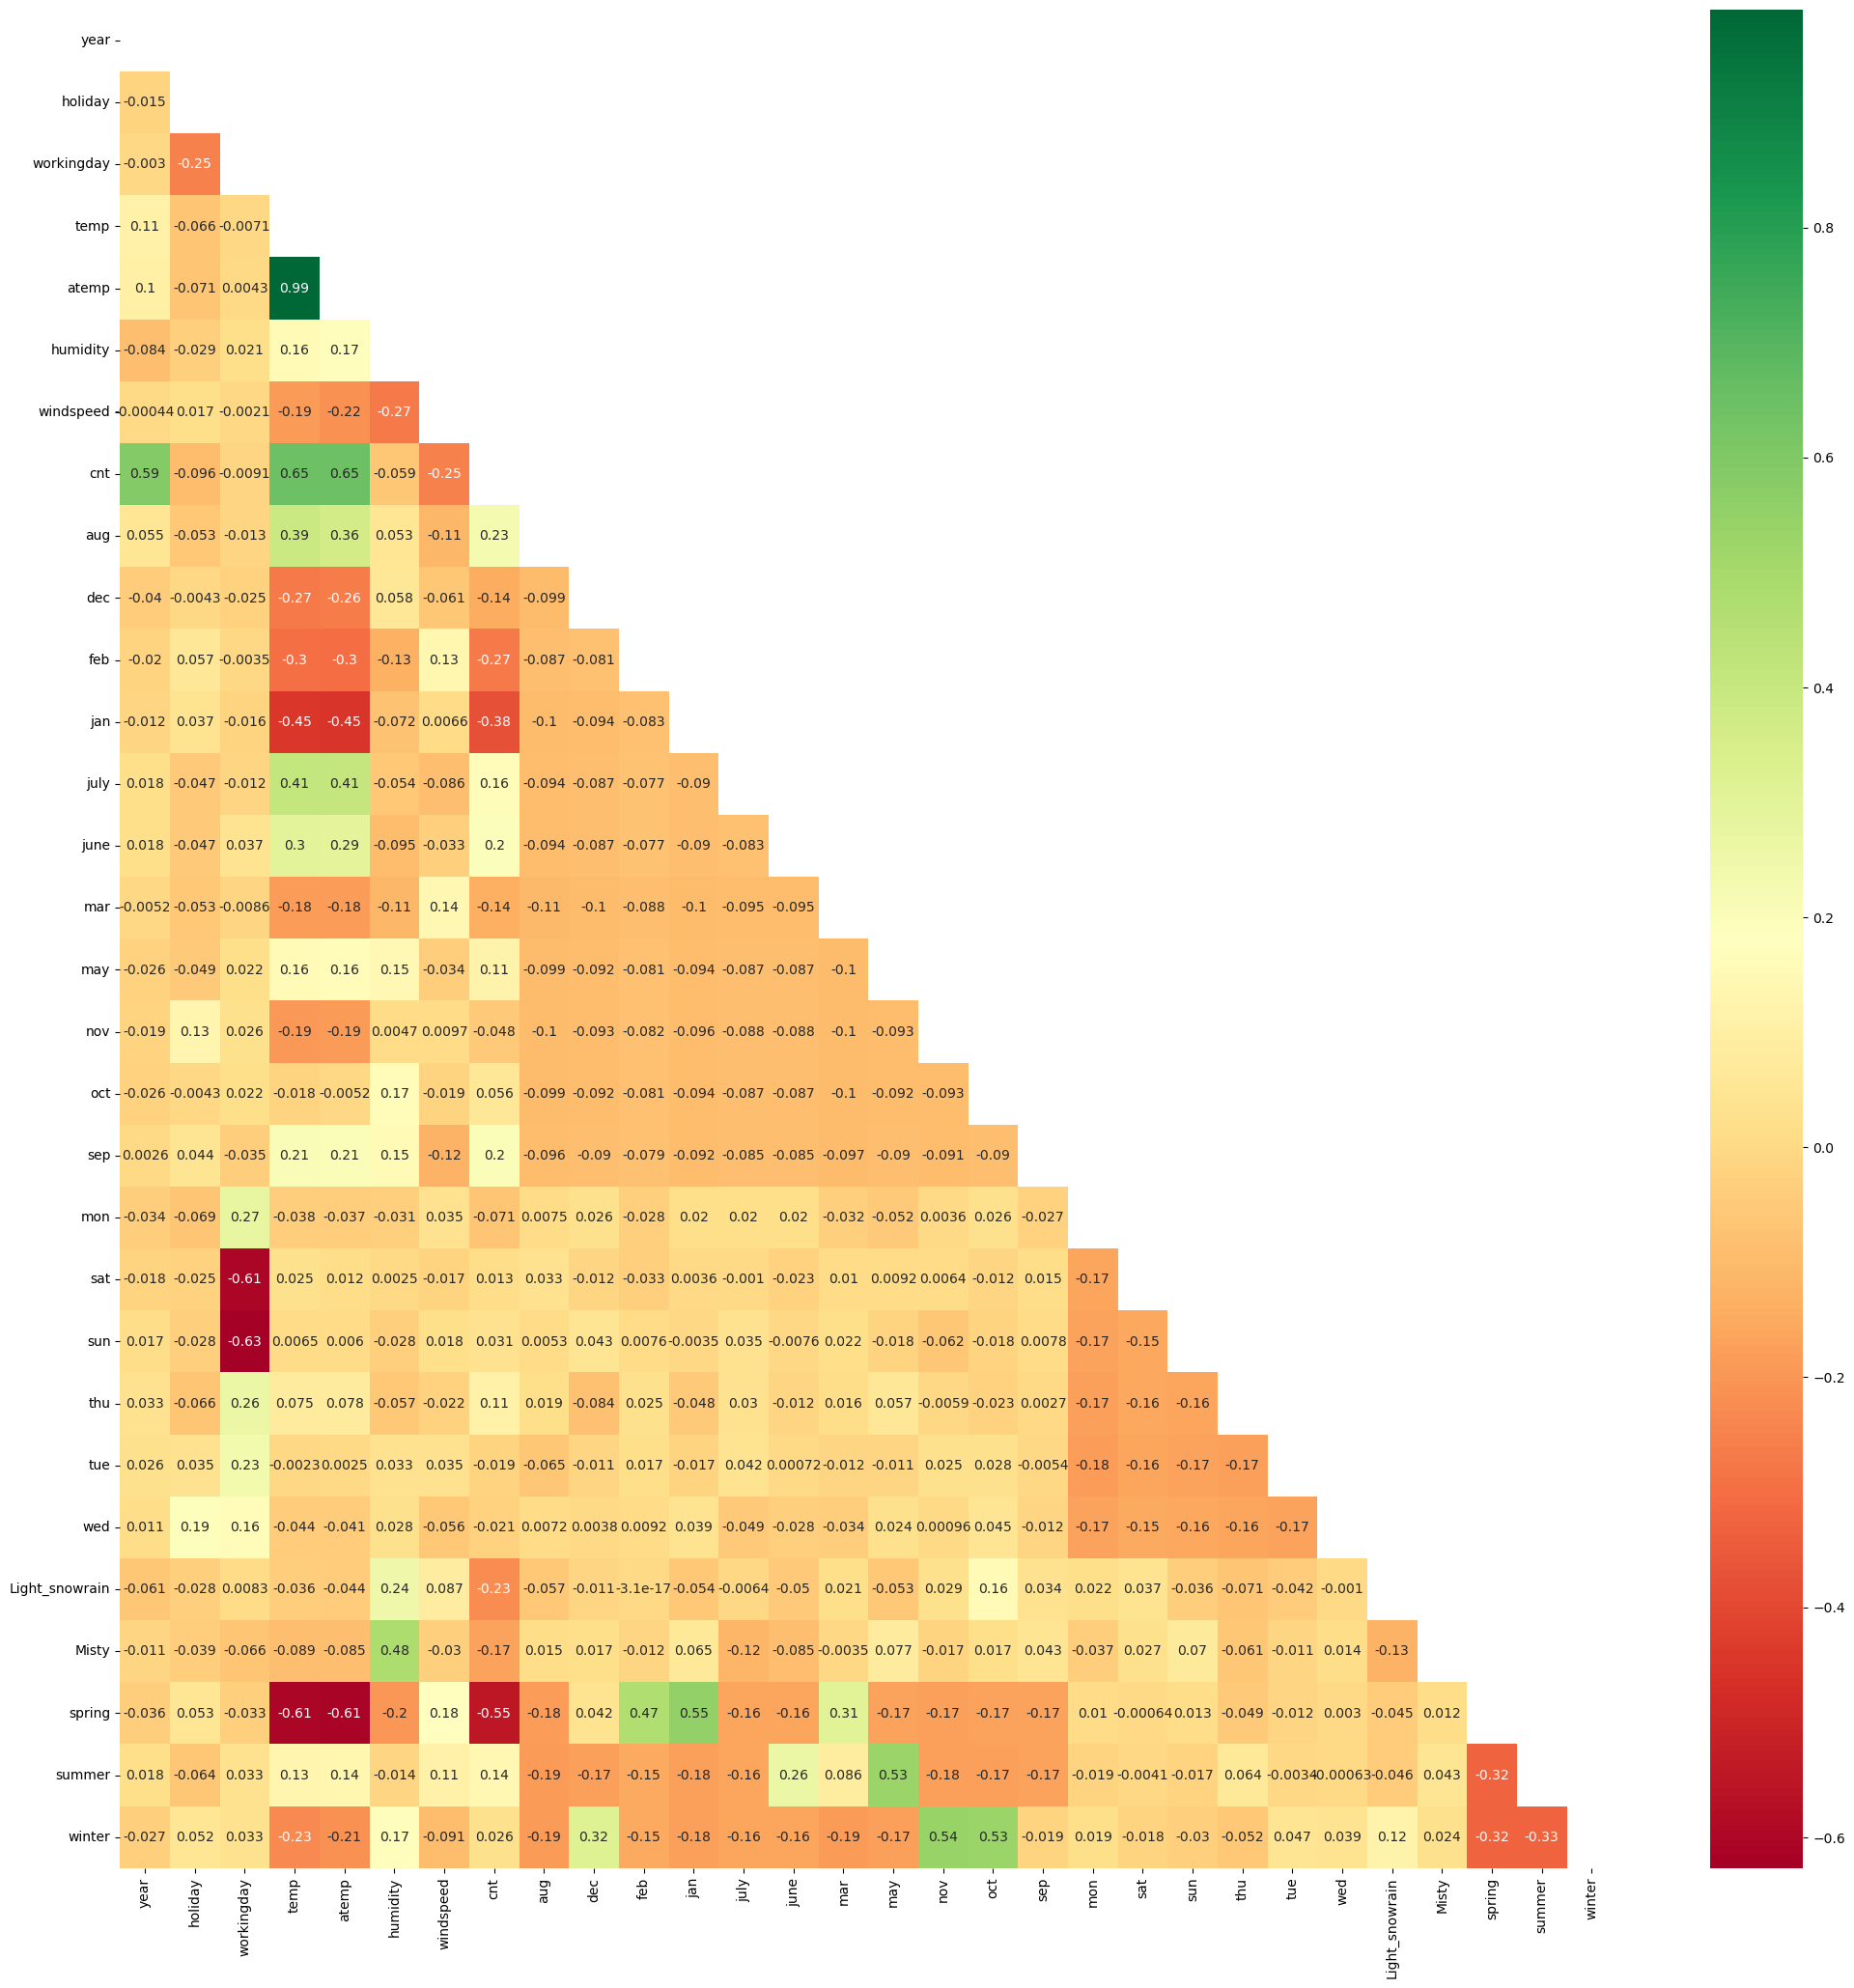

In [50]:
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

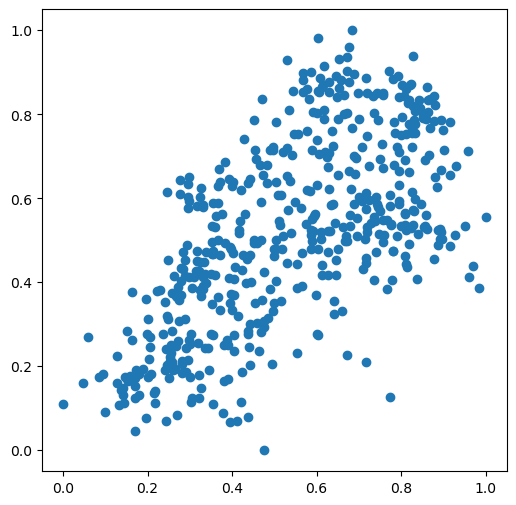

In [51]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

In [53]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
rfe = RFE(lm, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [57]:
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [58]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True])

In [59]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [60]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [61]:
X_train_rfe = X_train[col]

In [62]:
X_train_rfe

year  holiday      temp  humidity  windspeed  dec  jan  july  nov  sep  \
576     1        0  0.815169  0.725633   0.264686    0    0     1    0    0   
426     1        0  0.442393  0.640189   0.255342    0    0     0    0    0   
728     1        0  0.245101  0.498067   0.663106    1    0     0    0    0   
482     1        0  0.395666  0.504508   0.188475    0    0     0    0    0   
111     0        0  0.345824  0.751824   0.380981    0    0     0    0    0   
..    ...      ...       ...       ...        ...  ...  ...   ...  ...  ...   
578     1        0  0.863973  0.679690   0.187140    0    0     0    0    0   
53      0        0  0.202618  0.435939   0.111379    0    0     0    0    0   
350     0        0  0.248216  0.577930   0.431816    1    0     0    0    0   
79      0        0  0.462664  0.759870   0.529881    0    0     0    0    0   
520     1        0  0.600225  0.632030   0.359599    0    0     0    0    0   

     Light_snowrain  Misty  spring  summer  winter  
576               0      0       0       0       0  
426               0      1       1       0       0  
728               0      0       1       0       0  
482               0      1       0       1       0  
111               0      1       0       1       0  
..              ...    ...     ...     ...     ...  
578               0      0       0       0       0  
53                0      0       1       0       0  
350               0      1       0       0       1  
79                0      1       0       1       0  
520               0      1       0       1       0  

[510 rows x 15 columns]

In [63]:
calculateVIF(X_train_rfe)

Features    VIF
3         humidity  30.89
2             temp  17.79
4        windspeed   4.72
12          spring   4.37
14          winter   4.06
13          summer   2.82
11           Misty   2.32
0             year   2.09
8              nov   1.85
6              jan   1.75
7             july   1.59
5              dec   1.56
9              sep   1.41
10  Light_snowrain   1.28
1          holiday   1.06

In [64]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          8.15e-189
Time:                        12:16:52   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [65]:
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)
calculateVIF(X_train_new)

Features   VIF
2             temp  5.17
3        windspeed  4.67
13          winter  2.95
11          spring  2.89
12          summer  2.24
0             year  2.07
7              nov  1.81
5              jan  1.66
6             july  1.59
10           Misty  1.57
4              dec  1.47
8              sep  1.35
9   Light_snowrain  1.09
1          holiday  1.06

In [66]:
X_train_new

year  holiday      temp  windspeed  dec  jan  july  nov  sep  \
576     1        0  0.815169   0.264686    0    0     1    0    0   
426     1        0  0.442393   0.255342    0    0     0    0    0   
728     1        0  0.245101   0.663106    1    0     0    0    0   
482     1        0  0.395666   0.188475    0    0     0    0    0   
111     0        0  0.345824   0.380981    0    0     0    0    0   
..    ...      ...       ...        ...  ...  ...   ...  ...  ...   
578     1        0  0.863973   0.187140    0    0     0    0    0   
53      0        0  0.202618   0.111379    0    0     0    0    0   
350     0        0  0.248216   0.431816    1    0     0    0    0   
79      0        0  0.462664   0.529881    0    0     0    0    0   
520     1        0  0.600225   0.359599    0    0     0    0    0   

     Light_snowrain  Misty  spring  summer  winter  
576               0      0       0       0       0  
426               0      1       1       0       0  
728               0      0       1       0       0  
482               0      1       0       1       0  
111               0      1       0       1       0  
..              ...    ...     ...     ...     ...  
578               0      0       0       0       0  
53                0      0       1       0       0  
350               0      1       0       0       1  
79                0      1       0       1       0  
520               0      1       0       1       0  

[510 rows x 14 columns]

In [67]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          4.75e-186
Time:                        12:16:53   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [68]:
X_train_new = X_train_new.drop(['nov'], axis = 1)
calculateVIF(X_train_new)

Features   VIF
2             temp  5.14
3        windspeed  4.62
10          spring  2.89
11          summer  2.24
0             year  2.07
12          winter  2.05
5              jan  1.65
6             july  1.59
9            Misty  1.57
7              sep  1.34
4              dec  1.29
8   Light_snowrain  1.08
1          holiday  1.04

In [69]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          2.74e-186
Time:                        12:16:53   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

In [70]:
lr_3.params

const             0.228272
year              0.234275
holiday          -0.098193
temp              0.458108
windspeed        -0.159364
dec              -0.028270
jan              -0.045128
july             -0.049881
sep               0.074195
Light_snowrain   -0.287829
Misty            -0.079315
spring           -0.063192
summer            0.040370
winter            0.077434
dtype: float64

In [71]:
# ax^2 + bx + c

In [72]:
X_train_lm_3

const  year  holiday      temp  windspeed  dec  jan  july  sep  \
576    1.0     1        0  0.815169   0.264686    0    0     1    0   
426    1.0     1        0  0.442393   0.255342    0    0     0    0   
728    1.0     1        0  0.245101   0.663106    1    0     0    0   
482    1.0     1        0  0.395666   0.188475    0    0     0    0   
111    1.0     0        0  0.345824   0.380981    0    0     0    0   
..     ...   ...      ...       ...        ...  ...  ...   ...  ...   
578    1.0     1        0  0.863973   0.187140    0    0     0    0   
53     1.0     0        0  0.202618   0.111379    0    0     0    0   
350    1.0     0        0  0.248216   0.431816    1    0     0    0   
79     1.0     0        0  0.462664   0.529881    0    0     0    0   
520    1.0     1        0  0.600225   0.359599    0    0     0    0   

     Light_snowrain  Misty  spring  summer  winter  
576               0      0       0       0       0  
426               0      1       1       0       0  
728               0      0       1       0       0  
482               0      1       0       1       0  
111               0      1       0       1       0  
..              ...    ...     ...     ...     ...  
578               0      0       0       0       0  
53                0      0       1       0       0  
350               0      1       0       0       1  
79                0      1       0       1       0  
520               0      1       0       1       0  

[510 rows x 14 columns]

In [73]:
y_train_pred = lr_3.predict(X_train_lm_3)

In [74]:
y_train_pred

576    0.743919
426    0.482011
728    0.377692
482    0.574823
111    0.287036
         ...   
578    0.828515
53     0.240151
350    0.243014
79     0.316832
520    0.641262
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

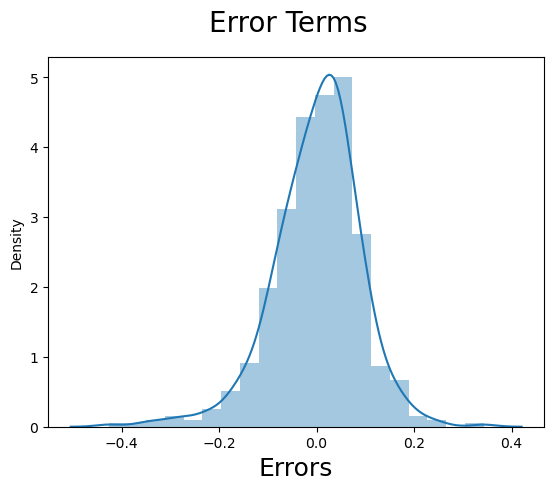

In [75]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

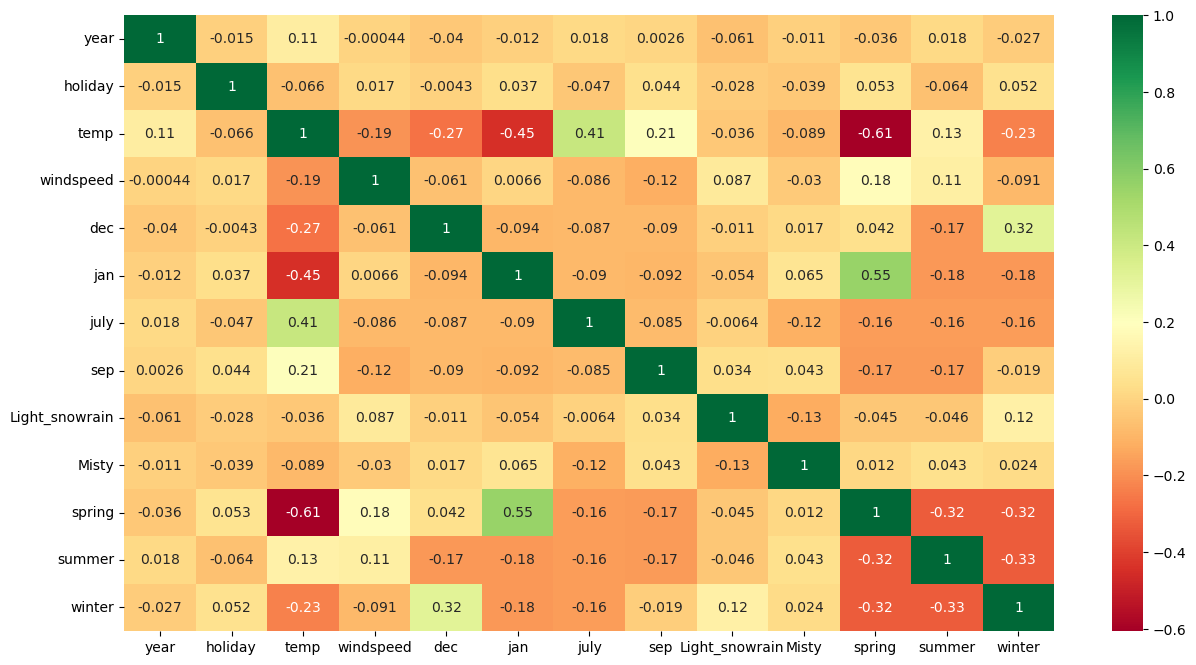

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

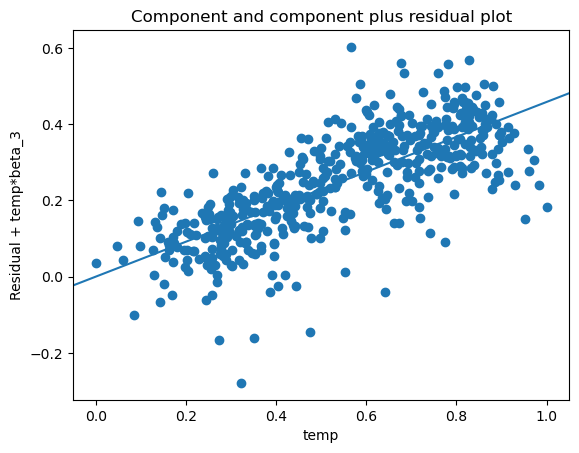

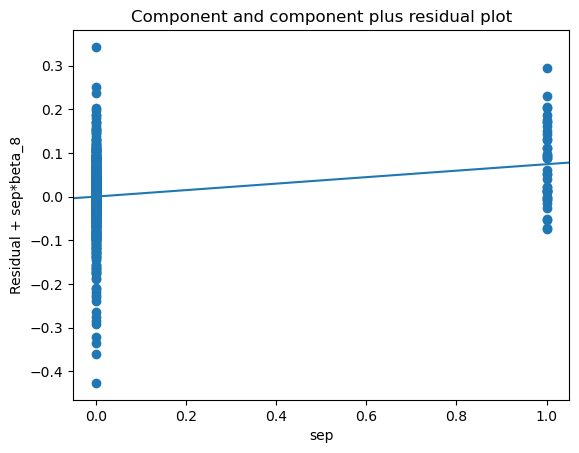

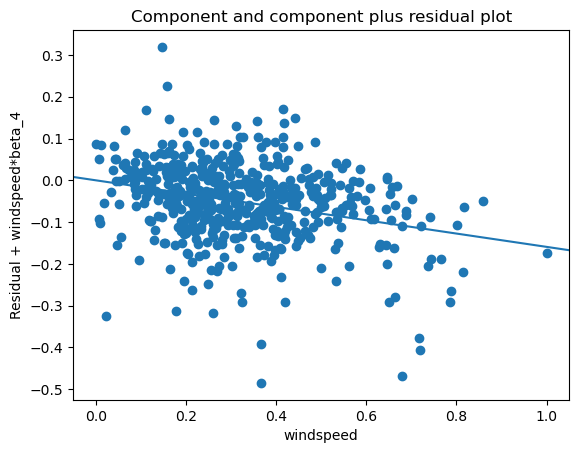

In [77]:
sm.graphics.plot_ccpr(lr_3, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'windspeed')
plt.show()

In [78]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
184     0        1           0  0.831783  0.769660  0.657364   0.084219   
535     1        0           1  0.901354  0.842587  0.610133   0.153728   
299     0        0           0  0.511964  0.496145  0.837699   0.334206   
221     0        0           1  0.881625  0.795343  0.437098   0.339570   
152     0        0           0  0.817246  0.741471  0.314298   0.537414   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184  0.692706    0    0  ...    0    0    0    0    1               0      1   
535  0.712034    0    0  ...    0    0    1    0    0               0      0   
299  0.303382    0    0  ...    1    0    0    0    0               0      1   
221  0.547400    1    0  ...    0    0    0    0    0               0      0   
152  0.569029    0    0  ...    1    0    0    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
X_test

year  holiday  workingday      temp     atemp  humidity  windspeed  aug  \
184     0        1           0  0.831783  0.769660  0.657364   0.084219    0   
535     1        0           1  0.901354  0.842587  0.610133   0.153728    0   
299     0        0           0  0.511964  0.496145  0.837699   0.334206    0   
221     0        0           1  0.881625  0.795343  0.437098   0.339570    1   
152     0        0           0  0.817246  0.741471  0.314298   0.537414    0   
..    ...      ...         ...       ...       ...       ...        ...  ...   
702     1        0           1  0.519232  0.511907  0.756118   0.283397    0   
127     0        0           1  0.584649  0.577380  0.650923   0.069510    0   
640     1        0           1  0.745598  0.682653  0.817947   0.052115    0   
72      0        0           1  0.331557  0.332005  0.512107   0.203418    0   
653     1        0           1  0.509887  0.501133  0.575354   0.300794    0   

     dec  feb  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
184    0    0  ...    0    0    0    0    1               0      1       0   
535    0    0  ...    0    0    1    0    0               0      0       0   
299    0    0  ...    1    0    0    0    0               0      1       0   
221    0    0  ...    0    0    0    0    0               0      0       0   
152    0    0  ...    1    0    0    0    0               0      0       0   
..   ...  ...  ...  ...  ...  ...  ...  ...             ...    ...     ...   
702    1    0  ...    0    0    0    0    1               0      0       0   
127    0    0  ...    0    0    0    1    0               0      0       0   
640    0    0  ...    0    0    1    0    0               0      1       0   
72     0    0  ...    0    0    0    0    1               0      0       1   
653    0    0  ...    0    0    0    0    1               0      0       0   

     summer  winter  
184       0       0  
535       1       0  
299       0       1  
221       0       0  
152       1       0  
..      ...     ...  
702       0       1  
127       1       0  
640       0       1  
72        0       0  
653       0       1  

[220 rows x 29 columns]

In [81]:
col_1 = list(X_train_lm_3.columns)[1:]

X_test = X_test[col_1]

In [82]:
X_test

year  holiday      temp  windspeed  dec  jan  july  sep  Light_snowrain  \
184     0        1  0.831783   0.084219    0    0     1    0               0   
535     1        0  0.901354   0.153728    0    0     0    0               0   
299     0        0  0.511964   0.334206    0    0     0    0               0   
221     0        0  0.881625   0.339570    0    0     0    0               0   
152     0        0  0.817246   0.537414    0    0     0    0               0   
..    ...      ...       ...        ...  ...  ...   ...  ...             ...   
702     1        0  0.519232   0.283397    1    0     0    0               0   
127     0        0  0.584649   0.069510    0    0     0    0               0   
640     1        0  0.745598   0.052115    0    0     0    0               0   
72      0        0  0.331557   0.203418    0    0     0    0               0   
653     1        0  0.509887   0.300794    0    0     0    0               0   

     Misty  spring  summer  winter  
184      1       0       0       0  
535      0       0       1       0  
299      1       0       0       1  
221      0       0       0       0  
152      0       0       1       0  
..     ...     ...     ...     ...  
702      0       0       0       1  
127      0       0       1       0  
640      1       0       0       1  
72       0       1       0       0  
653      0       0       0       1  

[220 rows x 13 columns]

In [83]:
X_test_lm_3 = sm.add_constant(X_test)

In [84]:
y_pred = lr_3.predict(X_test_lm_3)

In [85]:
y_pred

184    0.368507
535    0.891335
299    0.407665
221    0.578036
152    0.557383
         ...   
702    0.704411
127    0.525396
640    0.793924
72     0.284551
653    0.725628
Length: 220, dtype: float64

In [86]:
r2 = r2_score(y_test, y_pred)

In [87]:
r2

0.806351960631

Text(0, 0.5, 'y_pred')

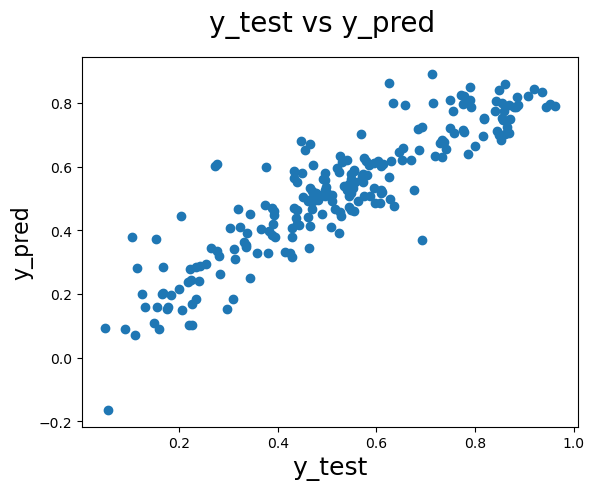

In [88]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [89]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7941


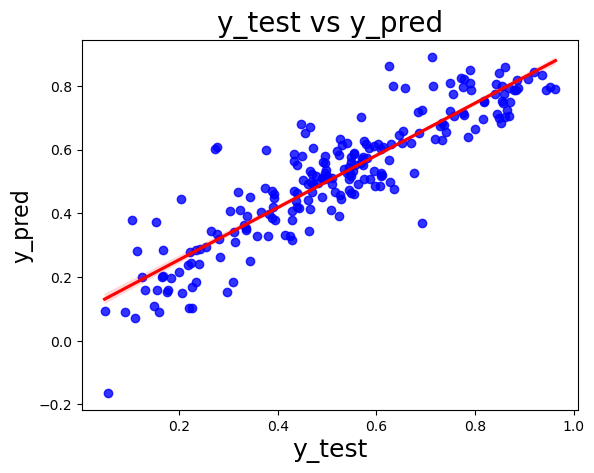

In [90]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()